In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
og_df = pd.read_csv("custom-import_data.csv")
clean_df = pd.read_csv("clean_custom_data.csv")

C:\Users\daisy\AppData\Local\Temp\ipykernel_19632\4032348637.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  og_df = pd.read_csv("custom-import_data.csv")


In [3]:
og_df.head()

,Unnamed: 0,Custom Office,Reg Number,Importer,HS Code,FOB Value (N),CIF Value (N),Total Tax(N),Receipt Number,Receipt Date,Mass(KG),Country of Origin,Country of Supply,Nbr Of Containers,Container Nbr,Container Size
0,0,UA PORT,C1195,29143,12900000,1046575,1119220,137105,R599,03/07/1866,126,Germany,NaN,0,NaN,NaN
1,1,UA PORT,C1195,29143,36700000,216957,232002,68365,R599,03/07/1866,26,Germany,NaN,0,NaN,NaN
2,2,UA PORT,C1195,29143,39390000,172037,183858,54415,R599,03/07/1866,21,Germany,NaN,0,NaN,NaN
3,3,UA PORT,C1277,62056,40890000,776007,915286,162868,R621,03/08/1866,71,Belgium,Belgium,0,NaN,NaN
4,4,UA PORT,C1292,93763,37100000,234651,301040,37415,R614,03/08/1866,45,Turkey,Turkey,0,NaN,NaN


In [4]:
clean_df.head()

,Unnamed: 0,Custom Office,Reg Number,Importer,HS Code,FOB Value (N),CIF Value (N),Total Tax(N),Receipt Number,Receipt Date,Mass(KG),Country of Origin,Country of Supply,Nbr Of Containers,Container Nbr,Container Size
0,0,UA PORT,C1195,29143,29143,1046575,1119220,137105,R599,2021-07-03,126,Germany,Germany,0,NaN,NaN
1,1,UA PORT,C1195,29143,29143,216957,232002,68365,R599,2021-07-03,26,Germany,Germany,0,NaN,NaN
2,2,UA PORT,C1195,29143,29143,172037,183858,54415,R599,2021-07-03,21,Germany,Germany,0,NaN,NaN
3,3,UA PORT,C1277,62056,62056,776007,915286,162868,R621,2021-08-03,71,Belgium,Belgium,0,NaN,NaN
4,4,UA PORT,C1292,93763,93763,234651,301040,37415,R614,2021-08-03,45,Turkey,Turkey,0,NaN,NaN


In [5]:
og_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          77789 non-null  int64 
 1   Custom Office       77789 non-null  object
 2   Reg Number          77789 non-null  object
 3   Importer            77789 non-null  int64 
 4   HS Code             77789 non-null  int64 
 5   FOB Value (N)       77789 non-null  int64 
 6   CIF Value (N)       77789 non-null  int64 
 7   Total Tax(N)        77789 non-null  int64 
 8   Receipt Number      76493 non-null  object
 9   Receipt Date        76493 non-null  object
 10  Mass(KG)            77789 non-null  object
 11  Country  of Origin  77789 non-null  object
 12  Country  of Supply  76826 non-null  object
 13  Nbr Of Containers   77789 non-null  object
 14  Container Nbr       45436 non-null  object
 15  Container Size      45436 non-null  object
dtypes: int64(6), object(10

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          77789 non-null  int64 
 1   Custom Office       77789 non-null  object
 2   Reg Number          77789 non-null  object
 3   Importer            77789 non-null  int64 
 4   HS Code             77789 non-null  int64 
 5   FOB Value (N)       77789 non-null  int64 
 6   CIF Value (N)       77789 non-null  int64 
 7   Total Tax(N)        77789 non-null  int64 
 8   Receipt Number      77789 non-null  object
 9   Receipt Date        76493 non-null  object
 10  Mass(KG)            77789 non-null  int64 
 11  Country  of Origin  77789 non-null  object
 12  Country  of Supply  77789 non-null  object
 13  Nbr Of Containers   77789 non-null  int64 
 14  Container Nbr       45500 non-null  object
 15  Container Size      45500 non-null  object
dtypes: int64(8), object(8)

# Import Volume and Value KPIs 

### Total Import Value (FOB & CIF) 

In [7]:
total_fob = clean_df["FOB Value (N)"].sum()
total_cif = clean_df["CIF Value (N)"].sum()

print("Total Import Value - FOB (N): ", f"{total_fob:,.0f}")
print("Total Import Value - CIF (N):", f"{total_cif:,.0f}")

Total Import Value - FOB (N):  1,804,111,287,883
Total Import Value - CIF (N): 1,927,802,620,225


### Average Import Value (FOB & CIF) 

In [8]:
avg_fob = clean_df["FOB Value (N)"].mean()
avg_cif = clean_df["CIF Value (N)"].mean()

print("Average Import Value - FOB (N): ", f"{avg_fob:,.2f}")
print("Average Import Value - CIF (N):", f"{avg_cif:,.2f}")

Average Import Value - FOB (N):  23,192,370.23
Average Import Value - CIF (N): 24,782,457.93


### Top Importing Countries by Value

In [9]:
top_countries = clean_df.groupby("Country  of Origin")['CIF Value (N)'].sum().sort_values(ascending=False)
top_countries.head(15) 

Country  of Origin
China                       778152905627
Lebanon                     120804276914
Italy                       118965182814
United Kingdom              117336385997
India                       115410214065
Korea, Republic of           82499174404
United States                80496660368
Sweden                       73043448235
Republic of South Africa     65485150300
Hong Kong                    44778947046
Germany                      40082627329
United Arab Emirates         38500408942
Thailand                     36135672272
Romania                      33261534060
Belgium                      32024361770
Name: CIF Value (N), dtype: int64

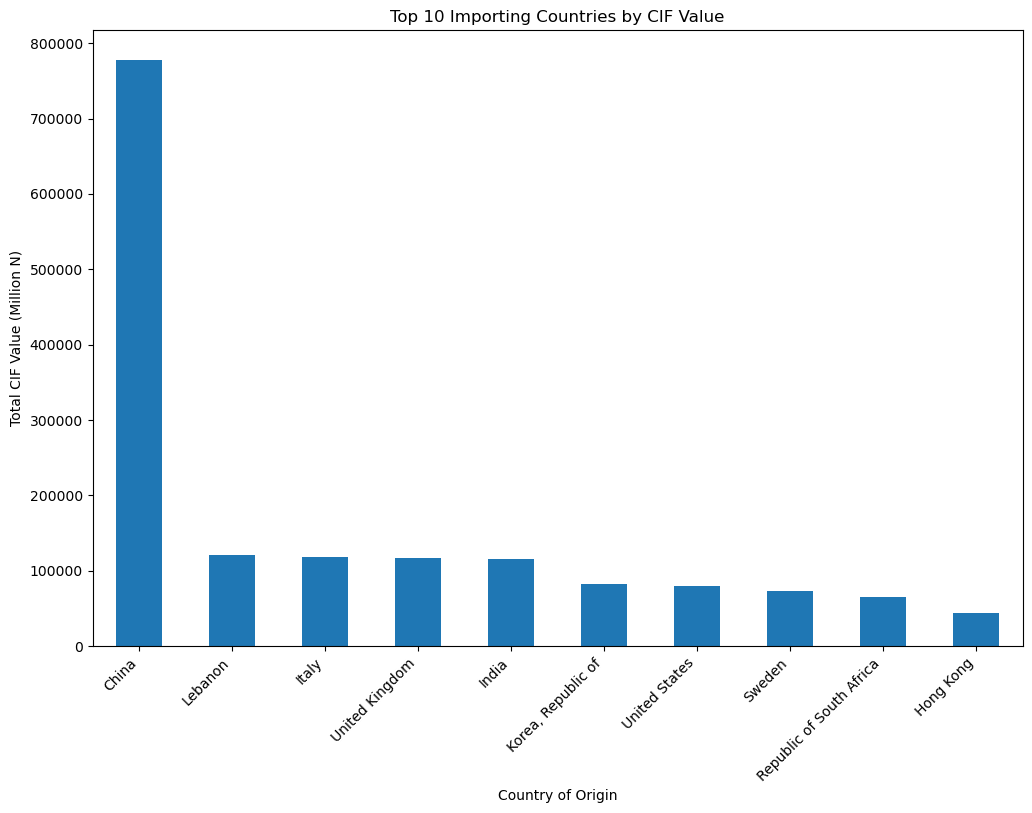

In [24]:
plt.figure(figsize=(12,8))
(top_countries/ 1_000_000).head(10).plot(kind='bar')
plt.title('Top 10 Importing Countries by CIF Value')
plt.xlabel('Country of Origin')
plt.ylabel('Total CIF Value (Million N)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top Importing Countries by Volume

In [11]:
top_importers = clean_df.groupby("Importer")["Mass(KG)"].sum().sort_values(ascending=False)
top_importers.head(10)

Importer
7013     80231589
11327    75745198
30571    68418797
61090    60939646
69009    36299428
96059    30278549
35437    29428192
37193    28928351
62948    25975092
28895    22505722
Name: Mass(KG), dtype: int64

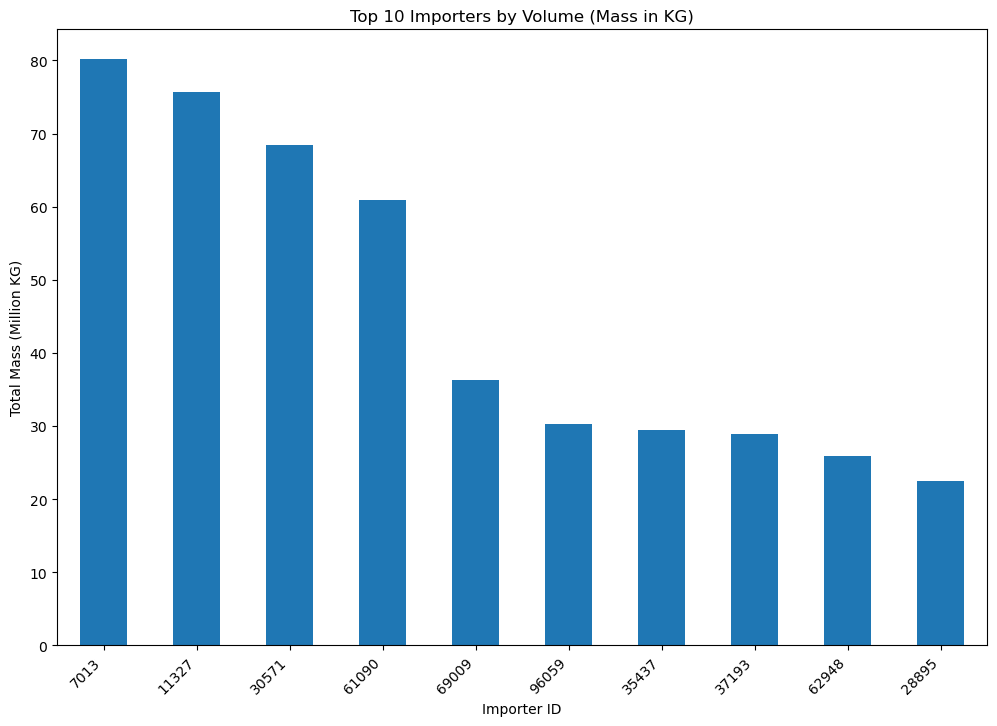

In [28]:
plt.figure(figsize=(12,8))
(top_importers / 1_000_000).head(10).plot(kind='bar')
plt.title('Top 10 Importers by Volume (Mass in KG)')
plt.xlabel('Importer ID')
plt.ylabel('Total Mass (Million KG)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Average Import Mass per Transaction

In [18]:
avg_mass = clean_df['Mass(KG)'].mean()
print("Average Import Mass per Transaction: ", f"{avg_mass:,.2f}")

Average Import Mass per Transaction:  17,485.63


# Taxation and Revenue KPIs

### Total Tax Collected 

In [19]:
total_tax = clean_df['Total Tax(N)'].sum()
print("Total Tax Collected (N): ", f"{total_fob:,.0f}")

Total Tax Collected (N):  1,804,111,287,883


### Average Tax per Transaction

In [20]:
avg_tax = clean_df['Total Tax(N)'].mean()
print("Average Tax per Transaction (N): ", f"{avg_tax:,.2f}")

Average Tax per Transaction (N):  3,246,355.68


### Top Tax-Contributing Importers

In [22]:
top_tax_importers = (clean_df.groupby('Importer')['Total Tax(N)']
                            .sum()
                            .sort_values(ascending=False)
                    )

top_tax_importers.head(10)

Importer
69009    29522113044
37193    24644875768
11327    16126984870
96059    16052822615
94060    11128119401
44077     9211461148
35437     7561276465
67324     7189096820
28895     7020546613
45690     4681998721
Name: Total Tax(N), dtype: int64

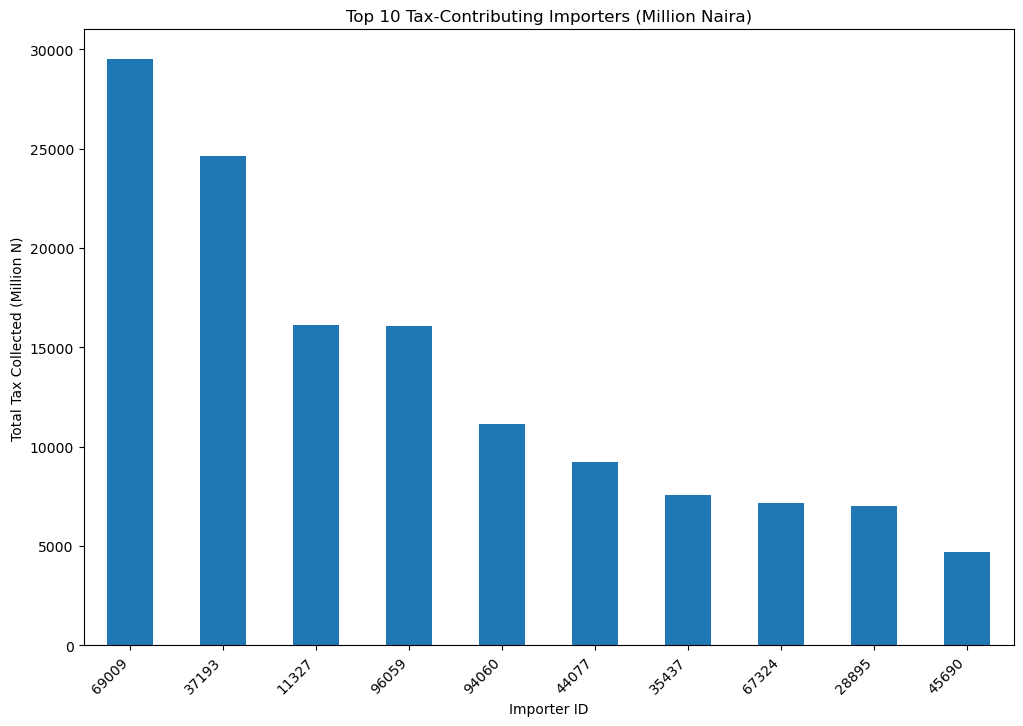

In [25]:
plt.figure(figsize=(12,8))
(top_tax_importers/  1_000_000).head(10).plot(kind='bar')
plt.title('Top 10 Tax-Contributing Importers (Million Naira)')
plt.xlabel('Importer ID')
plt.ylabel('Total Tax Collected (Million N)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Tax-to-Value Ratio

In [ ]:
# Using CIF Value as the base for total import value
tax_to_value_ratio = total_tax / total_cif

print("Tax-to-Value Ratio:", f"{tax_to_value_ratio:.2%}")

Tax-to-Value Ratio: 13.10%
